# Principle Component Initialization of Weights

## Import Modules

In [1]:
import os 
import sys

# CHANGE LEVELS:
chdir = os.path.dirname(os.getcwd())
sys.path.insert(0, chdir)

import numpy as np
from numpy.linalg import eig
from numpy import array, mean, cov, argsort, arange, linspace
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# PYSOM LIBRARY MODULES:
import pysom
from pysom.node import Node
from pysom.graph import Graph
from pysom.nodes.bmu import BMU
from pysom.nodes.dist import Dist
from pysom.nodes.concat import Concat
from pysom.nodes.calibrate import Calibrate
from pysom.nodes.som import SOM, nhood_mexican, nhood_gaussian, nhood_bubble, dist_manhattan, dist_cosine

## Load Animal

In [2]:
animal = ['Dove', 'Chicken', 'Duck', 'Goose', 'Owl', 'Hawk', 'Eagle', 'Fox', 'Dog', 'Wolf', 'Cat', 'Tiger', 'Lion', 'Horse', 'Zebra', 'Cow']
features = [
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],    # Dove
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],    # Chicken
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],    # Duck
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],    # Goose
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Owl
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Hawk
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Eagle
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Fox
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],    # Dog
    [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Wolf
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Cat
    [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],    # Tiger
    [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Lion
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Horse
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Zebra
    [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]     # Cow
]

feats = pd.DataFrame(features)
feats.columns = ['Small', 'Medium', 'Big', '2-legs', '4-legs', 'Hair', 'Hooves', 'Mane', 'Feathers', 'Hunt', 'Run', 'Fly', 'Swim']

data = array(feats.values, dtype=float)

## Helper Plot Function

In [3]:
plt.rcParams["figure.figsize"] = (20, 10)

def plot_features(size, out):
    for bmu, labels in out.items():
        labels = list(labels)
        print(labels)

        for i in range(len(labels)):
            plt.text(bmu[0] + 0.1, bmu[1] + (i + 1) / len(labels) - 0.35, labels[i], fontsize=20)

    plt.xticks(np.arange(size + 1))
    plt.yticks(np.arange(size + 1))
    plt.grid()
    plt.show()

## PCA Initialisation to Save Computation Costs

PCA initialisation provides a short cut to getting the map closer to it's final stable state. Essentially, this means that convergence occur more quickly - saving the #iterations (computation cost) required to get to a final state. 

The first two principle components are used. Weights are set upon initialisation as a linear combination of the first two principle components (capturing in my belief, 85% of the variation). This is compared to setting weights randomly. 

Instead, the weights are set in a range corresponding to the scale of the principle components.

Consider weight coefs w1 and w2 (between -1, 1). For a SOM, with neuron indices [i, j], use the values of w1[i] and w2[j] to set the weights of each neuron. That is, for all i, j indices: weight[i, j] = w1[m] * e1 + w2[n] * e2

## SOM (1) 
- Gaussian nhood 
- 16 x 16
- Norm: False
- PCA: False

['Dove']
['Chicken']
['Duck']
['Goose']
['Owl', 'Hawk']
['Eagle']
['Fox']
['Dog']
['Wolf']
['Cat']
['Tiger']
['Lion']
['Horse', 'Zebra']
['Cow']


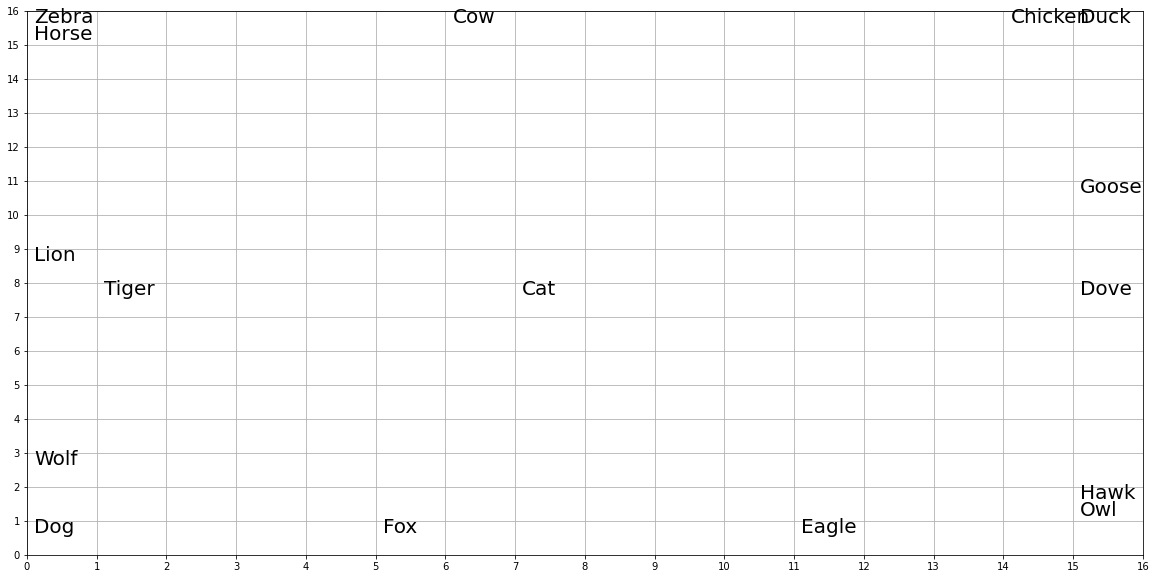

CPU times: user 2.53 s, sys: 98.8 ms, total: 2.63 s
Wall time: 6.32 s


In [4]:
%%time

g = Graph()

size = 16
som = g.create(SOM, props={'size': size, 'dim': 13, 'rand_state': True,
                            'nhood': nhood_gaussian, 'sigma': 12, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)

## SOM (1) - Norm
- Gaussian nhood 
- 16 x 16
- Norm: True
- PCA: False

['Dove']
['Chicken']
['Duck', 'Goose']
['Owl', 'Hawk']
['Eagle']
['Fox']
['Dog', 'Wolf']
['Cat']
['Tiger']
['Lion']
['Horse', 'Zebra']
['Cow']


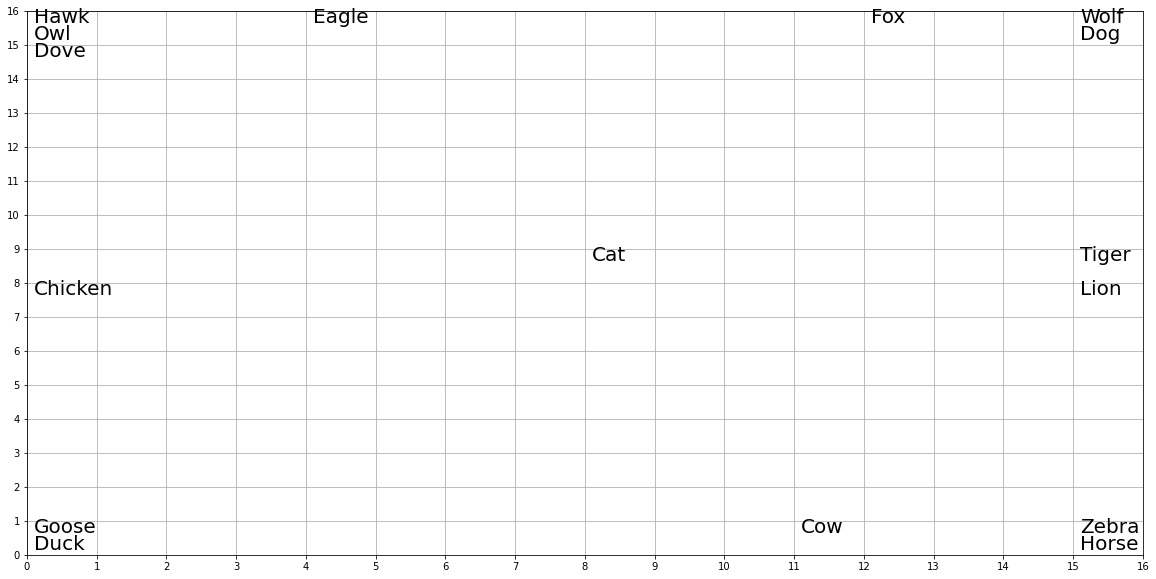

CPU times: user 1.84 s, sys: 51.2 ms, total: 1.89 s
Wall time: 3.26 s


In [5]:
%%time

g = Graph()

size = 16
som = g.create(SOM, props={'size': size, 'dim': 13, 'rand_state': True, 'norm': True,
                            'nhood': nhood_gaussian, 'sigma': 12, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)

## SOM (1) - Norm & PCA
- Gaussian nhood 
- 16 x 16
- Norm: True
- PCA: True

/Users/imgapodbury/Desktop/deep-som-dome/pysom/nodes/som.py:310: ComplexWarning: Casting complex values to real discards the imaginary part
  self.weights[i, j] = (pc0 * vec[ord_val[0]]) + (pc1 * vec[ord_val[1]])


['Dove']
['Chicken']
['Duck', 'Goose']
['Owl', 'Hawk']
['Eagle']
['Fox']
['Dog', 'Wolf']
['Cat']
['Tiger']
['Lion']
['Horse', 'Zebra']
['Cow']


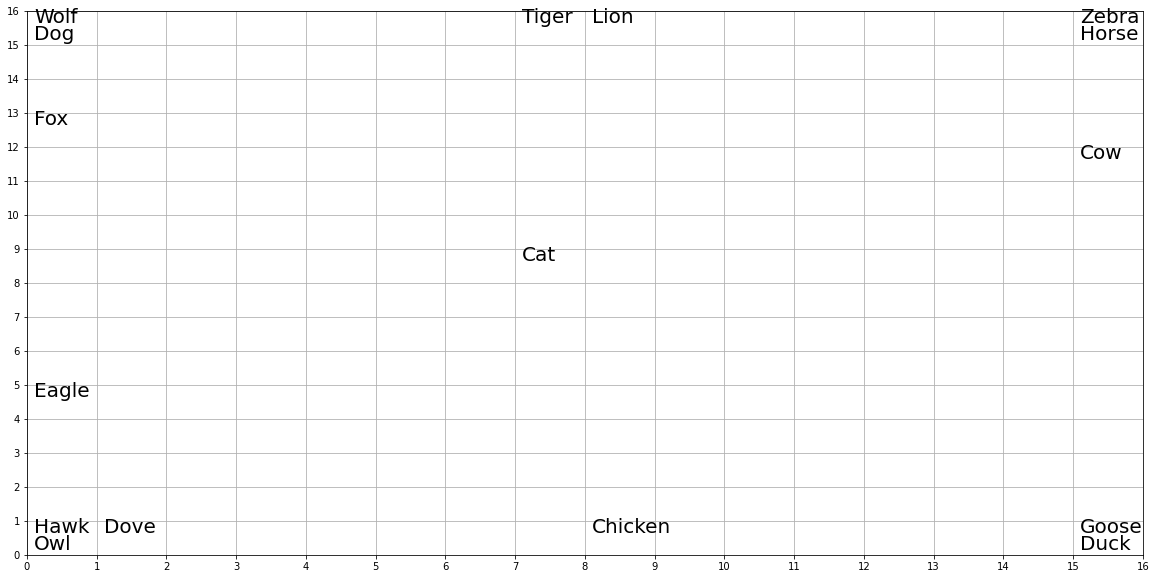

CPU times: user 1.86 s, sys: 52.7 ms, total: 1.91 s
Wall time: 2.55 s


In [6]:
%%time

g = Graph()

size = 16
som = g.create(SOM, props={'size': size, 'dim': 13, 'rand_state': True, 'norm': True, 'pca': True,
                            'nhood': nhood_gaussian, 'sigma': 12, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)

## Effect on other Nhood Relations

## SOM (1) - Norm & PCA
- Bubble nhood 
- 14 x 14
- Norm: True
- PCA: True

['Dove']
['Chicken']
['Duck', 'Goose']
['Owl', 'Hawk']
['Eagle']
['Fox', 'Dog']
['Wolf', 'Lion']
['Cat']
['Tiger']
['Horse', 'Zebra']
['Cow']


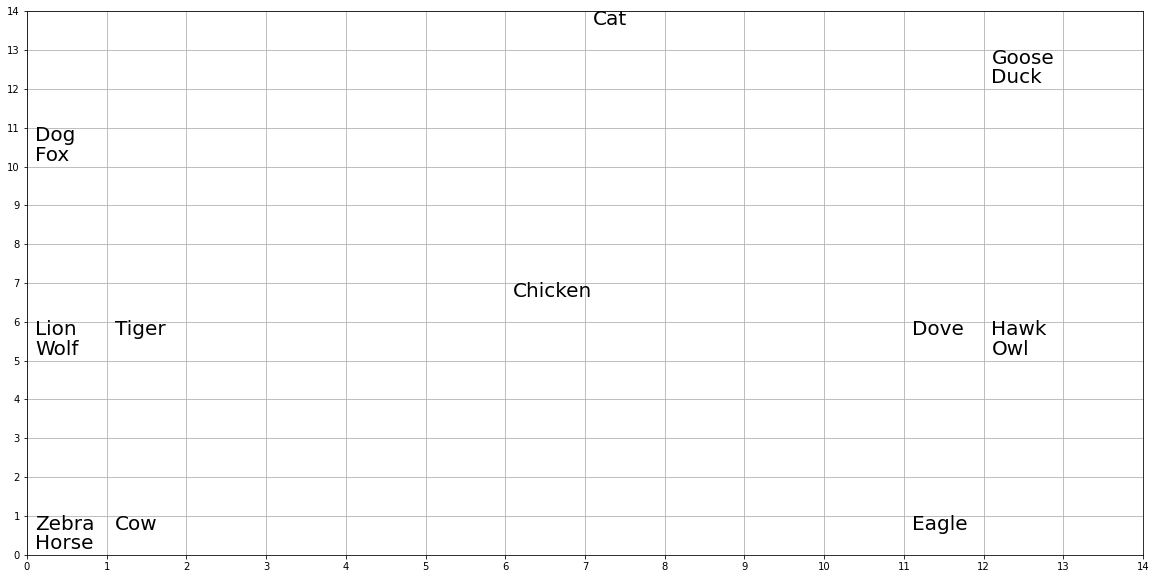

In [7]:
g = Graph()

size = 14
som = g.create(SOM, props={'size': size, 'dim': 13, 'pca': True, 'norm': True, 'rand_state': True,
                            'nhood': nhood_bubble, 'sigma': 13, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)

## SOM (1) - Norm & PCA
- Mexican nhood 
- 6 x 6
- Norm: True
- PCA: True

['Dove', 'Chicken']
['Duck', 'Goose']
['Owl', 'Hawk']
['Eagle']
['Fox', 'Dog', 'Wolf', 'Lion']
['Cat']
['Tiger']
['Horse', 'Zebra', 'Cow']


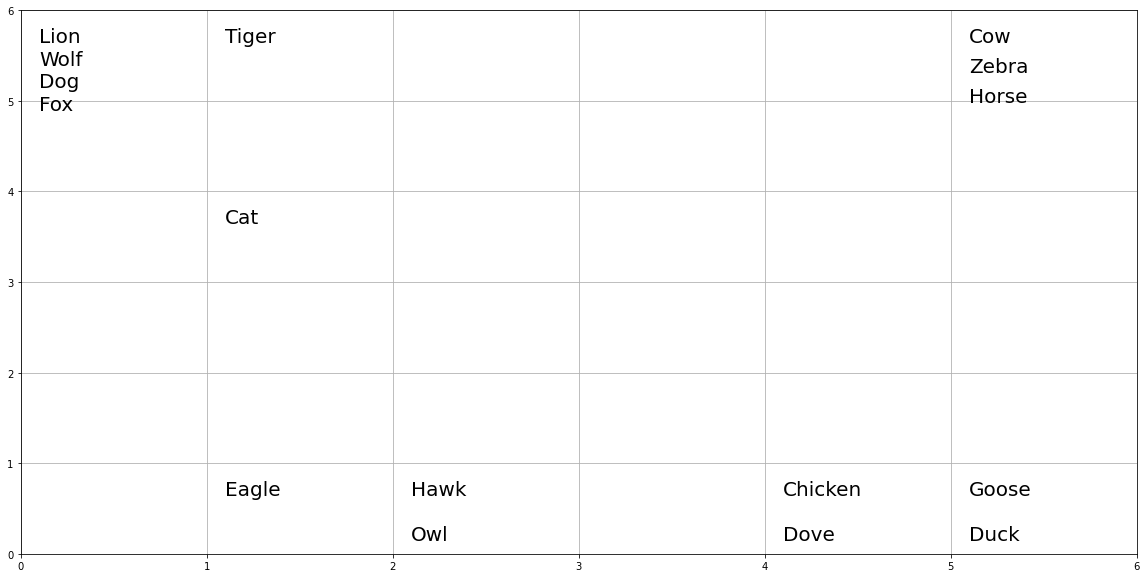

In [8]:
g = Graph()

size = 6
som = g.create(SOM, props={'size': size, 'dim': 13, 'pca': True, 'norm': True, 'rand_state': True,
                            'nhood': nhood_mexican, 'sigma': 13, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)